In [29]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [59]:
from transformers import AutoModelForCausalLM, TFAutoModel, AutoTokenizer
import torch

In [ ]:
with open("coursedata 1.json", 'r', encoding='utf-8') as data:
    data = json.load(data)

In [26]:
df = pd.DataFrame(data)

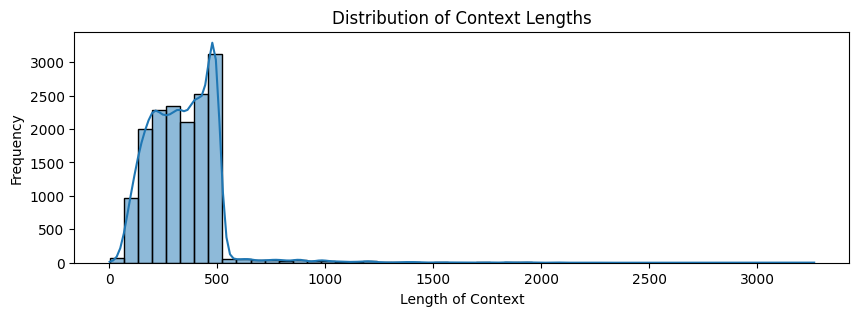

In [31]:
df['Context_length'] = df['course_goals'].apply(len)
plt.figure(figsize=(10,3))
sns.histplot(df['Context_length'], bins=50, kde=True)
plt.title('Distribution of Context Lengths')
plt.xlabel('Length of Context')
plt.ylabel('Frequency')
plt.show()

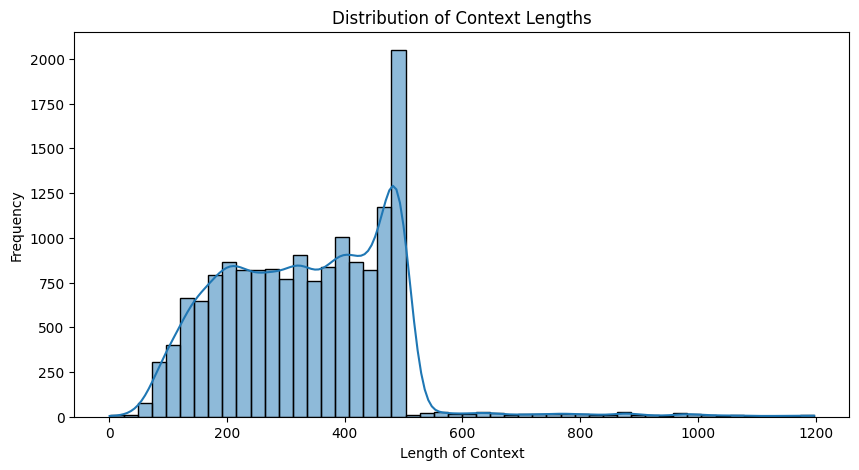

In [37]:
filtred_data = df[df['Context_length'] <= 1200]

ln_goals = filtred_data['course_goals'].apply(len)
plt.figure(figsize=(10,5))
sns.histplot(ln_goals, bins=50, kde=True)
plt.title('Distribution of Context Lengths')
plt.xlabel('Length of Context')
plt.ylabel('Frequency')
plt.show()

In [52]:
base_model = "/kaggle/input/llama-3/transformers/8b-chat-hf/1"
new_model = "unsloth/Llama-3.2-1B-bnb-4bit"

torch_dtype = torch.float16
attn_implementation = "eager"

In [60]:
model_name = "sentence-transformers/all-mpnet-base-v2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = TFAutoModel.from_pretrained(model_name)

def embed_text(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFMPNetModel: ['embeddings.position_ids']
- This IS expected if you are initializing TFMPNetModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFMPNetModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFMPNetModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFMPNetModel for predictions without further training.


In [61]:
from sklearn.metrics.pairwise import cosine_similarity

# Oblicz podobieństwo
def find_most_similar(query_vec, data_vectors, top_k=3):
    similarities = cosine_similarity([query_vec], data_vectors)
    most_similar_indices = similarities.argsort()[0][-top_k:][::-1]
    return most_similar_indices, similarities[0][most_similar_indices]
